# Exploring different pretrained models using tensornet

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf  # for TF 2
import tensornets as nets
tf.disable_v2_behavior()  # for TF 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.1.0'

---

# Image classification using ResNet50

---

### Choose model

In [3]:
inputs = tf.placeholder(tf.float32, [None, 224, 224, 3])
model = nets.ResNet50(inputs)

assert isinstance(model, tf.Tensor)

Instructions for updating:
Please use `layer.__call__` method instead.


### Load image using nets.utils.load_img

In [4]:
img = nets.utils.load_img('car.jpg', target_size=224)
assert img.shape == (1, 224, 224, 3)

### Get predictions from model

- preprocess image for model
- load pretrained weights for model
- get predictions from model

In [5]:
with tf.Session() as session:
    img = model.preprocess(img)
    session.run(model.pretrained())
    feed_dict = {
        inputs: img
    }
    preds = session.run(model, feed_dict)

In [6]:
print(nets.utils.decode_predictions(preds, top=5)[0])
best_pred = nets.utils.decode_predictions(preds, top=1)[0][0]

[('n03895866', 'passenger_car', 0.3534673), ('n04335435', 'streetcar', 0.22029674), ('n02930766', 'cab', 0.19569637), ('n06874185', 'traffic_light', 0.040926486), ('n03770679', 'minivan', 0.036951758)]


Confidence: 0.3534673


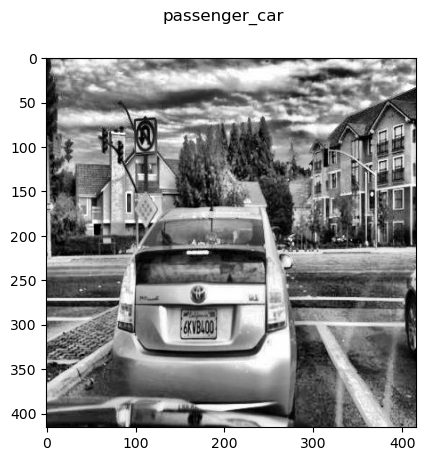

In [7]:
img = mpimg.imread('car.jpg')
imgplot = plt.imshow(img)
plt.suptitle(best_pred[1])

print('Confidence:', best_pred[2])

---

# Object detection using Yolov2

---

In [8]:
inputs = tf.placeholder(tf.float32, [None, 416, 416, 3])
model = nets.YOLOv2(inputs, nets.Darknet19)

img = nets.utils.load_img('car.jpg', target_size=416)

Instructions for updating:
Use `tf.cast` instead.


In [ ]:
model.preprocess(img)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\19255\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\19255\AppData\Local\Temp\ipykernel_16712\2853892530.py", line 1, in <module>
    model.preprocess(img)
  File "C:\Users\19255\anaconda3\envs\python37\lib\site-packages\tensornets\preprocess.py", line 39, in _direct
    return __preprocess_dict__[model_name](inputs, target_size)
  File "C:\Users\19255\anaconda3\envs\python37\lib\site-packages\tensornets\preprocess.py", line 114, in darknet_preprocess
    y[i] = cv2.resize(x[i], (w, h), interpolation=cv2.INTER_CUBIC)
cv2.error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type


During handling of the above exception, another e